Customer Segmentation Analysis

In [ ]:
#1.Collect and Preprocess Data

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
data = pd.read_csv('/content/customer_segmentation_data.csv')

In [ ]:
#Display first few rows of the dataset
print(data.head())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


In [ ]:
#Check for missing values
print(data.isnull().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [ ]:
#Drop duplicates if any
data.drop_duplicates(inplace=True)

In [ ]:
#Select relevant features
features = ['income', 'spending_score']
data_filtered = data[features]

In [ ]:
#Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_filtered)

In [ ]:
print(scaled_features[:5])

[[ 0.31686767  1.35846776]
 [-0.28201608  0.32186512]
 [ 1.11277804 -0.71473752]
 [-1.21009592  0.80561302]
 [ 1.52337438 -1.02571832]]


In [ ]:
#2.Apply Clustering Algorithms

In [ ]:
#K-means clustering with Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

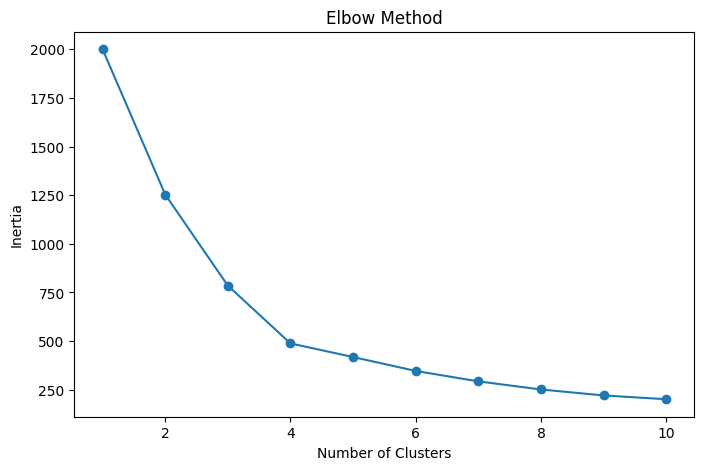

In [ ]:
#Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

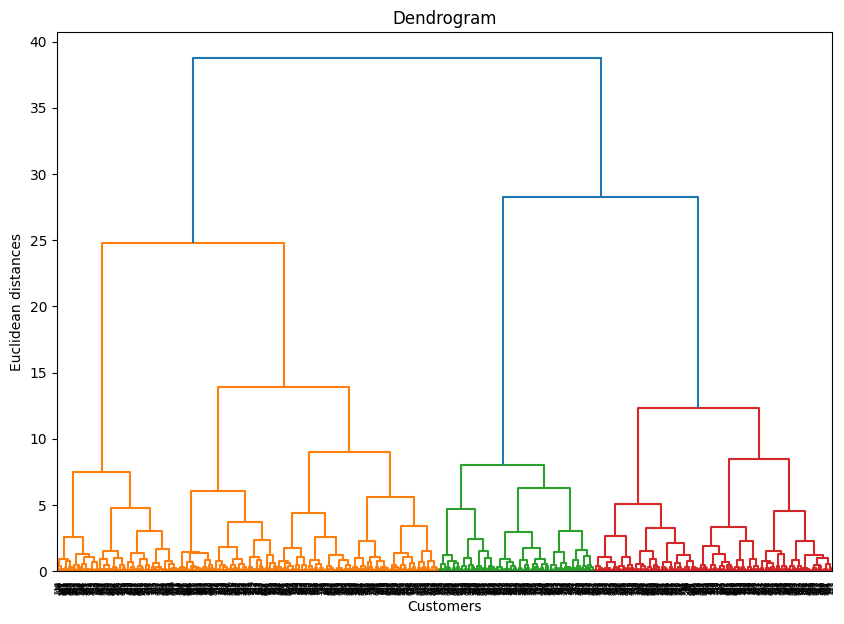

In [ ]:
#Hierarchical Clustering
linkage_matrix = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)

In [ ]:
#3.Analyze and Interpret the Clusters

In [ ]:
#Analyze KMeans Clusters
kmeans_summary = data.groupby('KMeans_Cluster').agg({
    col: 'mean' for col in data.select_dtypes(include=['number']).columns})
print(kmeans_summary)

                        id        age         income  spending_score  \
KMeans_Cluster                                                         
0               497.508143  43.078176   67692.762215       22.765472   
1               517.797183  44.785915  125582.357746       49.653521   
2               485.050296  43.369822   68453.801775       77.127219   

                membership_years  purchase_frequency  last_purchase_amount  \
KMeans_Cluster                                                               
0                       5.462541           26.039088            497.950261   
1                       5.332394           26.470423            474.895070   
2                       5.618343           27.233728            505.592278   

                KMeans_Cluster  Hierarchical_Cluster  
KMeans_Cluster                                        
0                          0.0              0.094463  
1                          1.0              0.884507  
2                          2

In [ ]:
#Analyze Hierarchical Clusters
hierarchical_summary = data.groupby('Hierarchical_Cluster').agg({
    col: 'mean' for col in data.select_dtypes(include=['number']).columns
})
print(hierarchical_summary)

                              id        age         income  spending_score  \
Hierarchical_Cluster                                                         
0                     506.148073  43.363083   92146.245436       25.425963   
1                     489.251634  43.683007   60381.388889       73.836601   
2                     503.771144  44.965174  122368.139303       77.393035   

                      membership_years  purchase_frequency  \
Hierarchical_Cluster                                         
0                             5.450304           26.432049   
1                             5.555556           26.470588   
2                             5.383085           27.189055   

                      last_purchase_amount  KMeans_Cluster  \
Hierarchical_Cluster                                         
0                               495.042130        0.470588   
1                               491.765229        1.810458   
2                               486.630547        

In [ ]:
#4.Visualize the Clusters

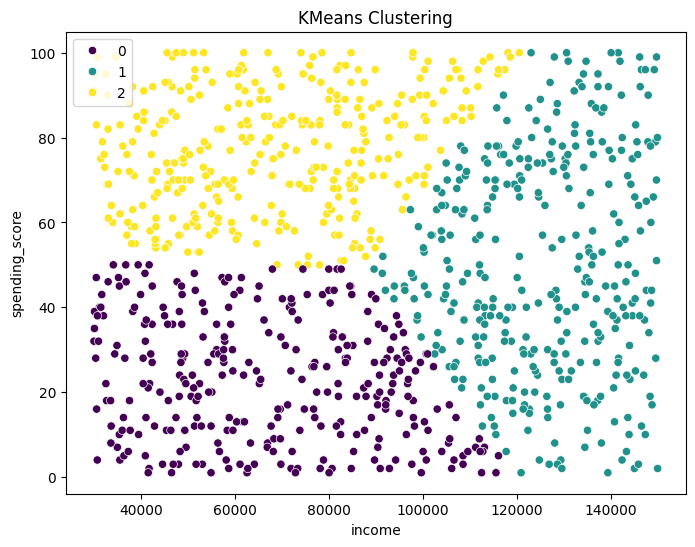

In [ ]:
# Scatter plot for KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['income'], y=data['spending_score'], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('income')
plt.ylabel('spending_score')
plt.legend()
plt.show()

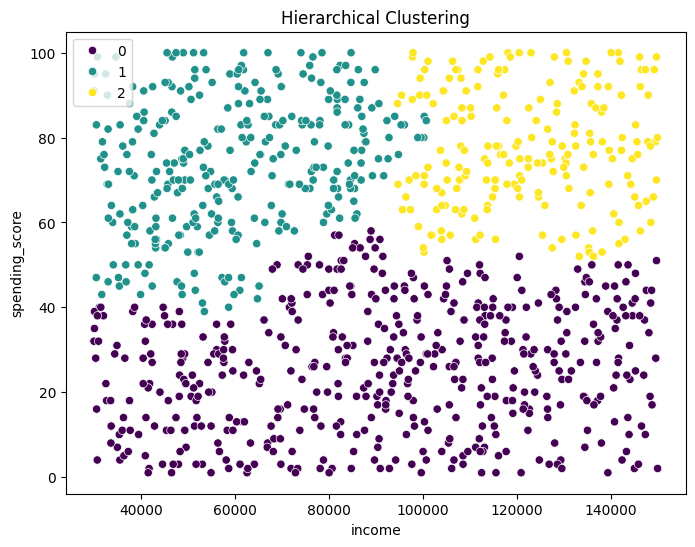

In [ ]:
# Scatter plot for Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['income'], y=data['spending_score'], hue=data['Hierarchical_Cluster'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('income')
plt.ylabel('spending_score')
plt.legend()
plt.show()